<a href="https://colab.research.google.com/github/HakanYlmz/dokuman/blob/master/basithalibitti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
doh = pd.read_csv('doh.csv', encoding='iso-8859-1', sep=";")
benign = pd.read_csv('benign.csv', encoding='iso-8859-1', sep=";")
malicious = pd.read_csv('malicious.csv', encoding='iso-8859-1', sep=";")
nondoh = pd.read_csv('l1-nondoh.csv', encoding='iso-8859-1', sep=";")

In [ ]:
bir1 = pd.concat([benign,malicious])
bir1.describe(include = "all")

In [ ]:
colums = bir1.columns
print(colums)

In [ ]:
dene = bir1
for i in range(0,33):
  dene[colums[i]] = dene[colums[i]].astype("category").cat.codes
dene.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,PacketLengthSkewFromMode,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,7,2,9117,0,4792,241249,28187,221473,28341,237683,87226,91788,40835,59,0,85616,89915,21223,244425,176928,95643,130949,4696,48897,207381,49153,181928,203552,144406,29604,6234,135695,9560,1.174.947.648.347.200.000.000.000.000,Benign
1,7,2,9117,0,4793,97595,33305,236286,33270,248420,373,9395,44141,75,0,55495,85731,34098,246708,178898,111408,130964,9916,129060,121564,22327,182779,204403,138511,22858,6372,150710,1261,1.402.381.756.499.100.000.000.000.000,Benign
2,7,2,9117,0,4794,93753,21062,79469,19030,173815,86638,91353,39447,40,0,76649,88692,21437,92670,240440,108661,119151,1255,141039,178798,120844,179250,200874,146156,29713,6267,147245,14159,0.9583479225395716167134328733,Benign
3,7,2,9117,0,4795,46149,28153,202384,28801,231312,93647,96716,8197,75,0,56368,88002,24758,51951,199785,110578,116732,4242,160258,137321,102209,168601,190225,129412,21456,6322,137056,4318,1.017.534.581.115.150.000.000.000.000,Benign
4,2,7,0,7287,4796,222193,32259,26155,29934,26067,91033,94880,42319,75,22,57263,1181,22492,217480,157186,86648,131954,16940,77697,196054,21670,206405,228029,141868,89,9930,149435,15020,1.084.482.917.963.680.000.000.000.000,Benign


In [ ]:
dene.describe(include="all")

In [ ]:
dene[colums[34]] = dene[colums[34]].astype("category").cat.codes
dene.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,PacketLengthSkewFromMode,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,7,2,9117,0,4792,241249,28187,221473,28341,237683,87226,91788,40835,59,0,85616,89915,21223,244425,176928,95643,130949,4696,48897,207381,49153,181928,203552,144406,29604,6234,135695,9560,1.174.947.648.347.200.000.000.000.000,0
1,7,2,9117,0,4793,97595,33305,236286,33270,248420,373,9395,44141,75,0,55495,85731,34098,246708,178898,111408,130964,9916,129060,121564,22327,182779,204403,138511,22858,6372,150710,1261,1.402.381.756.499.100.000.000.000.000,0
2,7,2,9117,0,4794,93753,21062,79469,19030,173815,86638,91353,39447,40,0,76649,88692,21437,92670,240440,108661,119151,1255,141039,178798,120844,179250,200874,146156,29713,6267,147245,14159,0.9583479225395716167134328733,0
3,7,2,9117,0,4795,46149,28153,202384,28801,231312,93647,96716,8197,75,0,56368,88002,24758,51951,199785,110578,116732,4242,160258,137321,102209,168601,190225,129412,21456,6322,137056,4318,1.017.534.581.115.150.000.000.000.000,0
4,2,7,0,7287,4796,222193,32259,26155,29934,26067,91033,94880,42319,75,22,57263,1181,22492,217480,157186,86648,131954,16940,77697,196054,21670,206405,228029,141868,89,9930,149435,15020,1.084.482.917.963.680.000.000.000.000,0


In [ ]:
dene.describe(include="all")

In [ ]:
dene1 = dene
for i in range(5,33):
  dene1 = dene1.drop(colums[i], axis=1)
dene1.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,ResponseTimeTimeCoefficientofVariation,Label
0,7,2,9117,0,4792,1.174.947.648.347.200.000.000.000.000,0
1,7,2,9117,0,4793,1.402.381.756.499.100.000.000.000.000,0
2,7,2,9117,0,4794,0.9583479225395716167134328733,0
3,7,2,9117,0,4795,1.017.534.581.115.150.000.000.000.000,0
4,2,7,0,7287,4796,1.084.482.917.963.680.000.000.000.000,0


In [ ]:
dene1 = dene1.drop("ResponseTimeTimeCoefficientofVariation", axis=1)

In [ ]:
dene1.describe(include ="all")

,SourceIP,DestinationIP,SourcePort,DestinationPort,Label
count,269643.000000,269643.000000,269643.000000,269643.000000,269643.000000
mean,9.237369,15.122933,5925.175551,984.088992,0.926544
std,4.987757,6.295524,4737.840650,2462.636371,0.260885
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,13.000000,1235.000000,0.000000,1.000000
50%,9.000000,19.000000,5591.000000,0.000000,1.000000
75%,13.000000,19.000000,9971.000000,0.000000,1.000000
max,20.000000,20.000000,15445.000000,11100.000000,1.000000


In [ ]:
X = dene1.iloc[:,:-1]
Y = dene1.iloc[:,-1]
X.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort
0,7,2,9117,0
1,7,2,9117,0
2,7,2,9117,0
3,7,2,9117,0
4,2,7,0,7287


In [ ]:
Y.tail()

249831    1
249832    1
249833    1
249834    1
249835    1
Name: Label, dtype: int8

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

model = keras.Sequential()


model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))




model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.inputs[0].dtype)
model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=2)
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))


<dtype: 'float32'>
Epoch 1/10
11292/11292 - 11s - loss: 40.1473 - accuracy: 0.8736
Epoch 2/10
11292/11292 - 11s - loss: 9.4418 - accuracy: 0.8849
Epoch 3/10
11292/11292 - 11s - loss: 2.6391 - accuracy: 0.8979
Epoch 4/10
11292/11292 - 11s - loss: 0.4970 - accuracy: 0.9190
Epoch 5/10
11292/11292 - 11s - loss: 0.1995 - accuracy: 0.9270
Epoch 6/10
11292/11292 - 11s - loss: 0.1725 - accuracy: 0.9362
Epoch 7/10
11292/11292 - 11s - loss: 0.1589 - accuracy: 0.9471
Epoch 8/10
11292/11292 - 11s - loss: 0.1438 - accuracy: 0.9561
Epoch 9/10
11292/11292 - 11s - loss: 0.1338 - accuracy: 0.9594
Epoch 10/10
11292/11292 - 11s - loss: 0.1301 - accuracy: 0.9609
Accuracy: 97.19


In [ ]:
from google.colab import files 

X.to_csv('ilk_data_x_.csv')
files.download('ilk_data_x_.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(X_train[0:])
ynew = model.predict(X_train[-1:])
print(ynew)
print(X_train[-1:])

       SourceIP  DestinationIP  SourcePort  DestinationPort
79922      17.0            8.0         0.0           6265.0
48527       0.0            6.0         0.0           6780.0
7543       13.0            1.0      9956.0              0.0
65201      19.0           15.0         0.0           3755.0
98847       8.0           20.0     10555.0              0.0
...         ...            ...         ...              ...
30250      13.0           20.0       846.0              0.0
78240      12.0           20.0      7496.0              0.0
5192        3.0           18.0      5167.0              0.0
57901       6.0           20.0      1961.0              0.0
78732      17.0           16.0         0.0           4981.0

[84292 rows x 4 columns]
[[1.]]
       SourceIP  DestinationIP  SourcePort  DestinationPort
78732      17.0           16.0         0.0           4981.0


doh and non doh


In [ ]:
nondoh = pd.read_csv('l1-nondoh.csv', encoding='iso-8859-1', sep=",")
bir2 = pd.concat([nondoh,doh])
bir2.describe(include = "all")

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,PacketLengthSkewFromMode,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
count,1003078,1003078,1.003078e+06,1.003078e+06,1003078,1003078.0,1.003078e+06,1003078.0,1.003078e+06,1003078.0,1003078.00,1003078.0,1003078.0,1.003078e+06,1.003078e+06,1003078.0,1003078.0,1.003078e+06,1003078.0,1003078.0,1003078.0,1003078.0,1003078.0,1003078.0,1003078.0,1003078.0,1003077.0,1003077.0,1003077.0,995229.000000,1.003077e+06,995229.0,1003077.0,1003077.0,1003077
unique,6772,33735,NaN,NaN,155251,698043.0,NaN,821623.0,NaN,824171.0,436964.00,436152.0,282635.0,NaN,NaN,436257.0,436333.0,4.365070e+05,849279.0,849279.0,815436.0,604612.0,131809.0,802350.0,802730.0,802528.0,635049.0,639742.0,601916.0,221476.000000,1.129680e+05,621244.0,626080.0,694742.0,2
top,192.168.20.191,9.9.9.11,NaN,NaN,30.03.2020 21:37,0.0,NaN,-1.0,NaN,-1.0,30.25,5.5,60.5,NaN,NaN,0.0,1.0,9.090909e-02,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.0,0.015209,7.000000e-06,-10.0,-10.0,0.0,NonDoH
freq,527429,47759,NaN,NaN,1903,4549.0,NaN,4549.0,NaN,4549.0,177169.00,177169.0,177178.0,NaN,NaN,216453.0,216327.0,1.771690e+05,4549.0,4549.0,4549.0,4566.0,744794.0,189324.0,189229.0,189229.0,290123.0,290123.0,7684.0,628.000000,1.170900e+04,290123.0,290123.0,290123.0,897493
mean,NaN,NaN,5.039089e+04,2.478230e+03,NaN,NaN,9.316449e+03,NaN,4.786839e+04,NaN,NaN,NaN,NaN,1.507207e+02,1.539525e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.302275e+04,1.006745e+04,NaN,NaN,7.159672e+04,NaN,3.764394e+05,NaN,NaN,NaN,NaN,2.915389e+02,3.535078e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,4.430000e+02,4.430000e+02,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,5.400000e+01,5.400000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.642200e+04,4.430000e+02,NaN,NaN,1.630000e+02,NaN,1.120000e+02,NaN,NaN,NaN,NaN,6.050000e+01,5.400000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.325900e+04,4.430000e+02,NaN,NaN,1.406000e+03,NaN,3.635000e+03,NaN,NaN,NaN,NaN,6.800000e+01,5.500000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.864200e+04,4.430000e+02,NaN,NaN,2.326000e+03,NaN,7.121000e+03,NaN,NaN,NaN,NaN,9.300000e+01,6.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dene2 = bir2

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(dene2)
le.classes_
le.transform([1, 1, 2, 6])

ValueError: ignored

In [ ]:
for i in range(5,33):
  dene2 = dene2.drop(colums[i], axis=1)
dene2.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,ResponseTimeTimeCoefficientofVariation,Label
0,72.21.91.42,192.168.20.191,443,51041,2020-01-14 15:49:01,12.4548,NonDoH
1,192.168.20.191,195.201.169.48,51043,443,2020-01-14 15:49:03,2.02527,NonDoH
2,192.168.20.191,96.17.115.57,51021,443,2020-01-14 15:49:03,0,NonDoH
3,192.168.20.191,96.114.14.140,50308,443,2020-01-14 15:49:03,0,NonDoH
4,192.168.20.191,23.78.199.198,50983,443,2020-01-14 15:49:03,0,NonDoH


In [ ]:
dene2 = dene2.drop("TimeStamp", axis=1)
dene2 = dene2.drop("ResponseTimeTimeCoefficientofVariation", axis=1)
dene2.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,Label
0,72.21.91.42,192.168.20.191,443,51041,NonDoH
1,192.168.20.191,195.201.169.48,51043,443,NonDoH
2,192.168.20.191,96.17.115.57,51021,443,NonDoH
3,192.168.20.191,96.114.14.140,50308,443,NonDoH
4,192.168.20.191,23.78.199.198,50983,443,NonDoH


In [ ]:
X_doh = dene1.iloc[:,:-1]
Y_doh = dene1.iloc[:,-1]
X_doh.head()

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_doh, Y_doh, test_size=0.33, random_state=1)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

model1 = keras.Sequential()
model1.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
model1.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.inputs[0].dtype)
model1.fit(X_train, y_train, epochs=15, batch_size=16, verbose=2)
# evaluate the keras model
_, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

<dtype: 'float32'>
Epoch 1/15
5269/5269 - 5s - loss: -1.1487e+09 - accuracy: 0.1561
Epoch 2/15
5269/5269 - 5s - loss: -1.2640e+10 - accuracy: 0.1561
Epoch 3/15
5269/5269 - 5s - loss: -4.4169e+10 - accuracy: 0.1561
Epoch 4/15
5269/5269 - 5s - loss: -1.0371e+11 - accuracy: 0.1561
Epoch 5/15
5269/5269 - 5s - loss: -1.9905e+11 - accuracy: 0.1561
Epoch 6/15
5269/5269 - 5s - loss: -3.3753e+11 - accuracy: 0.1561
Epoch 7/15
5269/5269 - 5s - loss: -5.2672e+11 - accuracy: 0.1561
Epoch 8/15


KeyboardInterrupt: ignored

In [ ]:

ynew = model1.predict(X_train[-1:])
print(ynew)
print(X_train[-1:])

[[0.99998546]]
        SourceIP  DestinationIP  SourcePort  DestinationPort  TimeStamp
108230      12.0           19.0      6855.0              0.0    23886.0


Başarı oranını yazdır

In [ ]:
score = model1.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.03879481181502342 / Test accuracy: 0.9826483726501465


In [ ]:
from matplotlib import pyplot as plt
history = model.fit(X_train, y_train,validation_split = 0.1, epochs=5, batch_size=4)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Epoch 1/5
40649/40649 [==============================] - 49s 1ms/step - loss: 0.0788 - accuracy: 0.9754 - val_loss: 0.0427 - val_accuracy: 0.9892
Epoch 2/5
40649/40649 [==============================] - 49s 1ms/step - loss: 0.0696 - accuracy: 0.9780 - val_loss: 0.0488 - val_accuracy: 0.9825
Epoch 3/5
40649/40649 [==============================] - 49s 1ms/step - loss: 0.0683 - accuracy: 0.9784 - val_loss: 0.0447 - val_accuracy: 0.9835
Epoch 4/5
40649/40649 [==============================] - 49s 1ms/step - loss: 0.0668 - accuracy: 0.9795 - val_loss: 0.0348 - val_accuracy: 0.9866
Epoch 5/5
40649/40649 [==============================] - 49s 1ms/step - loss: 0.0613 - accuracy: 0.9811 - val_loss: 0.0307 - val_accuracy: 0.9919


KeyError: ignored

In [ ]:
history.history

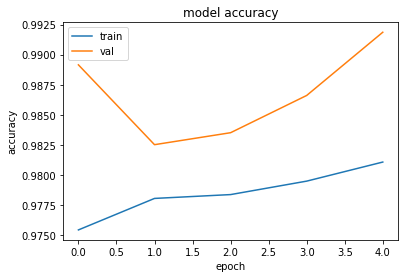

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()